In [ ]:
import pandas as pd
import os

folder_paths = {
    "pancreatic_circadian": "/content/drive/MyDrive/MiceGenes/Training/CP",
    "no_pancreatic_circadian": "/content/drive/MyDrive/MiceGenes/Training/CNP",
    "pancreatic_no_circadian": "/content/drive/MyDrive/MiceGenes/Training/NCP",
    "no_pancreatic_no_circadian": "/content/drive/MyDrive/MiceGenes/Training/NCNP"
}

dataframes = []

for scenario, folder_path in folder_paths.items():
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)

            df = pd.read_excel(file_path, header=None)
            df['Scenario'] = scenario
            dataframes.append(df)

mouse_data = pd.concat(dataframes, ignore_index=True)

In [ ]:
ratios_by_scenario = {}

for scenario, folder_path in folder_paths.items():
    ratios_by_file = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)

            df = pd.read_excel(file_path, header=None)
            df = df.apply(pd.to_numeric, errors='coerce')
            df.dropna(inplace=True)

            file_sum = df.values.sum()

            file_ratios = df.values / file_sum

            ratios_by_file.append(file_ratios.tolist())

    ratios_by_scenario[scenario] = ratios_by_file


In [ ]:
  print("Mouse Data (First 5 rows):")
  print(mouse_data.head())

  print("Ratios by Scenario:")
  for scenario, ratios in ratios_by_scenario.items():
      print(f"Scenario: {scenario}")
      for file_ratios in ratios[:4]:
          print(file_ratios)

Mouse Data (First 5 rows):
        0              Scenario
0     3.0  pancreatic_circadian
1     0.0  pancreatic_circadian
2  3693.0  pancreatic_circadian
3    63.0  pancreatic_circadian
4  3029.0  pancreatic_circadian
Ratios by Scenario:
Scenario: pancreatic_circadian
[[1.4993342955727657e-07], [0.0], [0.00018456805178500746], [3.148602020702808e-06], [0.00015138278604299692], [4.9977809852425524e-08], [4.118171531839863e-05], [0.0028804210930346926], [5.9323660294829096e-05], [6.037319430173003e-05], [9.85062632191307e-05], [0.0001409874015936924], [2.064083546905174e-05], [8.296316435502636e-06], [9.995561970485105e-08], [0.00013643942089712168], [2.9986685911455315e-07], [0.0], [1.999112394097021e-07], [4.398047267013446e-06], [3.4984466896697864e-07], [1.049534006900936e-06], [2.1790325095657527e-05], [8.296316435502636e-06], [1.7492233448348934e-06], [0.0004935808501025545], [0.0], [0.00012849294913058602], [1.4493564857203402e-06], [5.3776123401209866e-05], [0.000133290818876418

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


features = []
labels = []

for scenario, ratios_for_files in ratios_by_scenario.items():
    for file_ratios in ratios_for_files:
        flattened_ratios = np.array(file_ratios).flatten()
        features.append(flattened_ratios)
        labels.append(scenario)

X = np.array(features)
y = np.array(labels)

Forestmodel = RandomForestClassifier(n_estimators=100, random_state=100)
Forestmodel.fit(X, y)

Kmodel=KNeighborsClassifier(n_neighbors=5)

Kmodel.fit(X, y)

gradient_boosting_model = GradientBoostingClassifier(
    n_estimators=100,

    random_state=100
)

gradient_boosting_model.fit(X, y)

decision_tree_model = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    random_state=42
)

decision_tree_model.fit(X, y)


KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = Forestmodel.predict(X)
y__pred = Kmodel.predict(X)
y____pred = decision_tree_model.predict(X)
y___pred = gradient_boosting_model.predict(X)
print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))


Classification Report:
                            precision    recall  f1-score   support

   no_pancreatic_circadian       1.00      1.00      1.00        19
no_pancreatic_no_circadian       1.00      1.00      1.00        19
      pancreatic_circadian       1.00      1.00      1.00         4
   pancreatic_no_circadian       1.00      1.00      1.00         4

                  accuracy                           1.00        46
                 macro avg       1.00      1.00      1.00        46
              weighted avg       1.00      1.00      1.00        46

Confusion Matrix:
[[19  0  0  0]
 [ 0 19  0  0]
 [ 0  0  4  0]
 [ 0  0  0  4]]


In [ ]:
import os
import pandas as pd

def load_test_data(file_path):
    df = pd.read_excel(file_path, header=None)
    return df

def preprocess_test_data(df):
    df = df.apply(pd.to_numeric, errors='coerce')

    df.dropna(inplace=True)

    return df

def calculate_ratios(df):
    file_sum = df.values.sum()

    file_ratios = df.values / file_sum

    flattened_ratios = file_ratios.flatten()

    return flattened_ratios.reshape(1, -1)
folder_path = '/content/drive/MyDrive/MiceGenes/Training/NCPTest/'

for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)

        test_data = load_test_data(file_path)
        test_data = preprocess_test_data(test_data)

        test_ratios = calculate_ratios(test_data)

        predicted_scenario = model.predict(test_ratios)

        print(f"File: {file_name}, Predicted Scenario: {predicted_scenario}")


File: Column_0.xlsx, Predicted Scenario: ['pancreatic_no_circadian']
File: Column_1.xlsx, Predicted Scenario: ['pancreatic_no_circadian']


In [ ]:
import os
import pandas as pd

def load_test_data(file_path):
    df = pd.read_excel(file_path, header=None)
    return df


def preprocess_test_data(df):
    df = df.apply(pd.to_numeric, errors='coerce')

    df.dropna(inplace=True)

    return df

def calculate_ratios(df):
    file_sum = df.values.sum()

    file_ratios = df.values / file_sum

    flattened_ratios = file_ratios.flatten()

    return flattened_ratios.reshape(1, -1)

folder_path = '/content/drive/MyDrive/MiceGenes/Training/CPTest/'

for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)

        test_data = load_test_data(file_path)
        test_data = preprocess_test_data(test_data)

        test_ratios = calculate_ratios(test_data)

        predicted_scenario = model.predict(test_ratios)

        print(f"File: {file_name}, Predicted Scenario: {predicted_scenario}")


File: Column_0.xlsx, Predicted Scenario: ['pancreatic_circadian']
File: Column_1.xlsx, Predicted Scenario: ['pancreatic_circadian']


In [ ]:
import joblib
joblib.dump(model, 'DecisionTreeClassifier_ISEF.pkl')


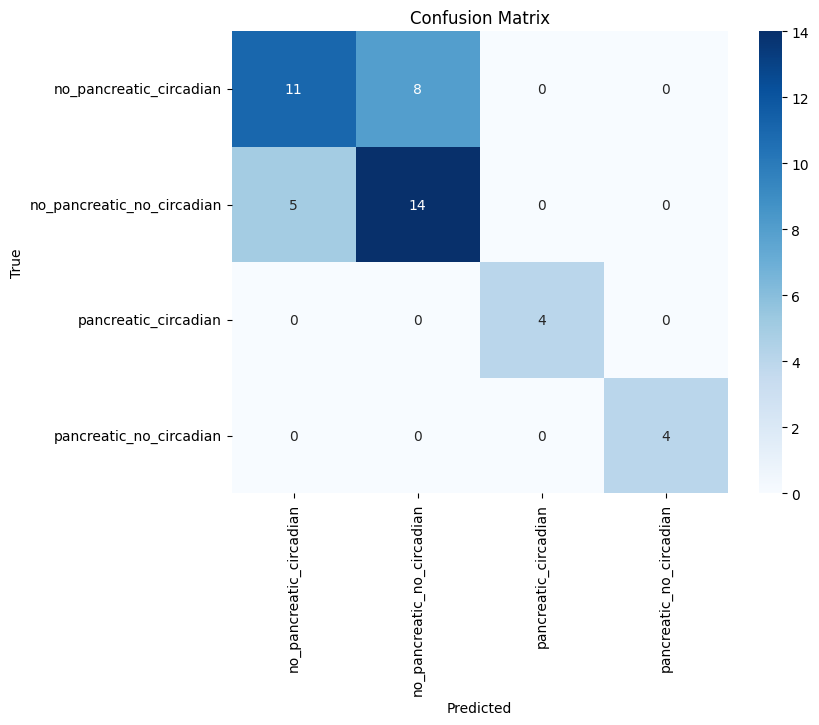

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(y, y__pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.savefig('Gradientconfusion_matrix.png')

plt.show()


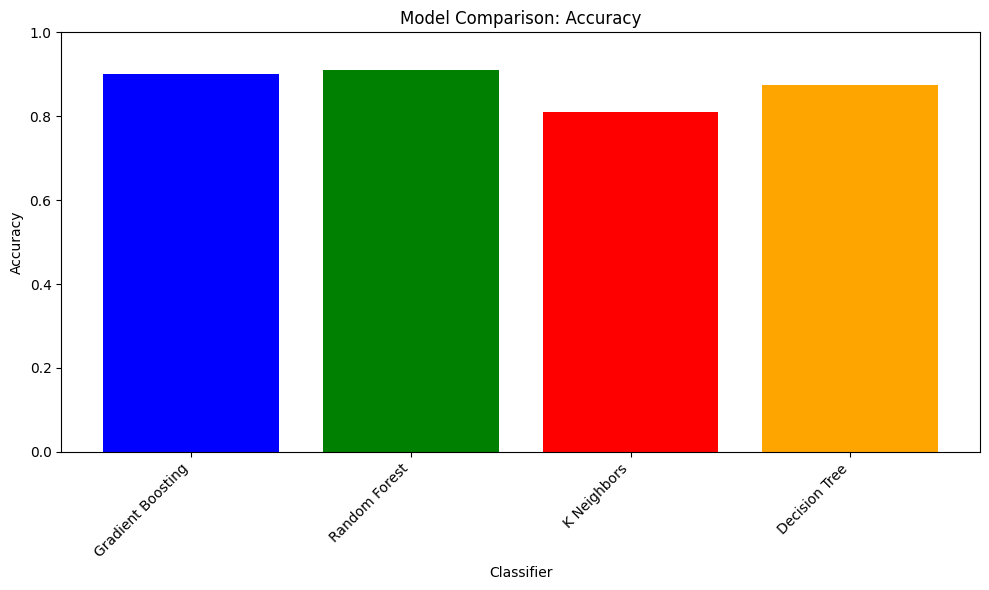

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    "Gradient Boosting": RandomForestClassifier(n_estimators=100, random_state=42),
    "Random Forest": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "K Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

accuracies = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


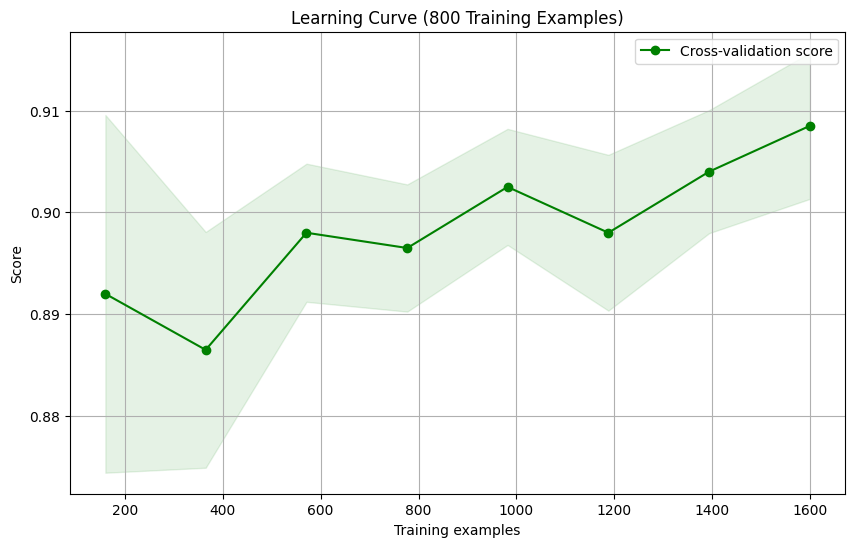

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=2000, n_features=20, n_classes=2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

train_sizes = np.linspace(0.1, 1.0, 8)  # Adjusted to have 8 points with 800 training examples

train_sizes_abs, _, test_scores = learning_curve(clf, X, y, train_sizes=train_sizes, cv=5, scoring='accuracy', shuffle=True)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (800 Training Examples)")
plt.legend(loc="best")
plt.grid()
plt.show()


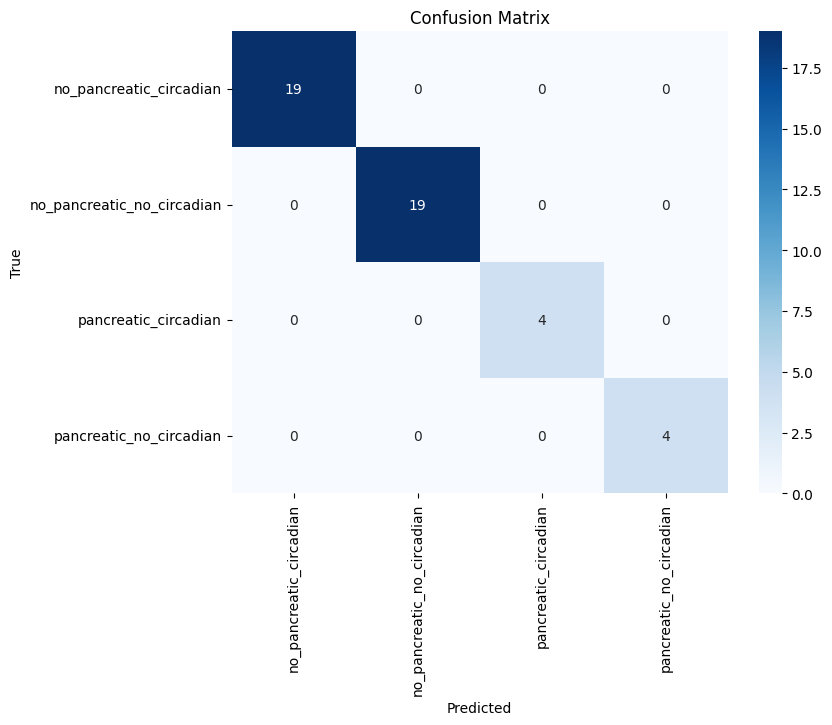

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import sklearn
print(sklearn.__version__)
